In [3]:
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from util import*
from tensorflow.keras import layers, Model


In [14]:
# Call to use GPU later maybe
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [5]:
# Specify the path to download data
download_path = os.getcwd() + "/dataset/"
print(download_path)

/home/zhenglyu/Desktop/git/cme-216-housing-pricing-prediction/dataset/


In [6]:
ds = download_skl_dataset(download_path)

In [7]:
data, target, feature_names, DESCR = data_process(ds)

In [8]:
data_norm, std_data, mean_data = feature_normalization(data, log_flag=False)

In [9]:
# Split data to training, validation and testset
x_train, y_train, x_val, y_val, x_test, y_test = train_set_prepare(data_norm, target, random_state=100)

In [10]:
# Craete model
class nn_model:
    def __init__(self, data, target):
        self.data = data
        self.target = target
        self.model = None
        self.history = None
    def build_model(self, neuron_list, reg_factor):
        
        model = tf.keras.models.Sequential()
        model.add(layers.InputLayer(self.data.shape[1]))
        
        for ii in range(len(neuron_list)):
            model.add(layers.Dense(neuron_list[ii], activation="tanh",
                               kernel_regularizer=tf.keras.regularizers.l2(reg_factor)))

        model.add(layers.Dense(1, activation="linear",
                             kernel_regularizer=tf.keras.regularizers.l2(reg_factor)))
        
        self.model = model
    def compile_model(self, optimizer="Adam", loss="mse", metrics=["mse"]):
        self.model.compile(optimizer=optimizer,
                          loss=loss,
                          metrics=metrics)    
    def train(self, x_train, y_train, x_val, y_val, batch_size, epochs, callbacks=None):
        self.history = self.model.fit(x_train, y_train,
                                     batch_size = batch_size,
                                     epochs = epochs,
                                     callbacks = callbacks,
                                     validation_data=(x_val, y_val))
    def test(self, x_test, y_test):
        return self.model.predict(x_test)

In [11]:
# Create the model class
model = nn_model(data, target)

# Build model
neuron_list = [256, 256, 256, 128, 128, 64, 32, 16, 8]
model.build_model(neuron_list, reg_factor=1e-7)

# Compile model
model.compile_model(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3))

In [13]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

# Train the model
model.train(x_train, y_train, x_val, y_val, batch_size=10, epochs=30, callbacks=[lr_scheduler])

Epoch 1/30
1652/1652 [==============================] - 5s 3ms/step - loss: 0.3684 - mse: 0.3681 - val_loss: 0.3254 - val_mse: 0.3251 - lr: 0.0010
Epoch 2/30
1652/1652 [==============================] - 5s 3ms/step - loss: 0.3995 - mse: 0.3994 - val_loss: 0.3561 - val_mse: 0.3559 - lr: 0.0010
Epoch 3/30
1652/1652 [==============================] - 6s 3ms/step - loss: 0.3625 - mse: 0.3623 - val_loss: 0.3641 - val_mse: 0.3638 - lr: 0.0010
Epoch 4/30
1652/1652 [==============================] - 5s 3ms/step - loss: 0.3074 - mse: 0.3072 - val_loss: 0.2832 - val_mse: 0.2829 - lr: 1.0000e-04
Epoch 5/30
1652/1652 [==============================] - 6s 3ms/step - loss: 0.2838 - mse: 0.2836 - val_loss: 0.2734 - val_mse: 0.2731 - lr: 1.0000e-04
Epoch 6/30
1652/1652 [==============================] - 6s 3ms/step - loss: 0.2745 - mse: 0.2744 - val_loss: 0.2741 - val_mse: 0.2739 - lr: 1.0000e-04
Epoch 7/30
1652/1652 [==============================] - 5s 3ms/step - loss: 0.2668 - mse: 0.2666 - val_los

KeyboardInterrupt: 

In [17]:
y_pred = model.test(x_test, y_test)

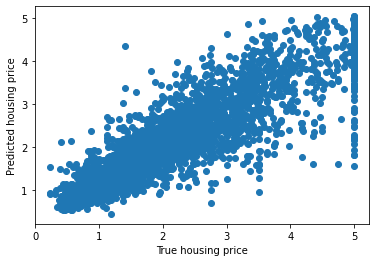

In [18]:
plot_pred_true(x_test, y_test, y_pred)

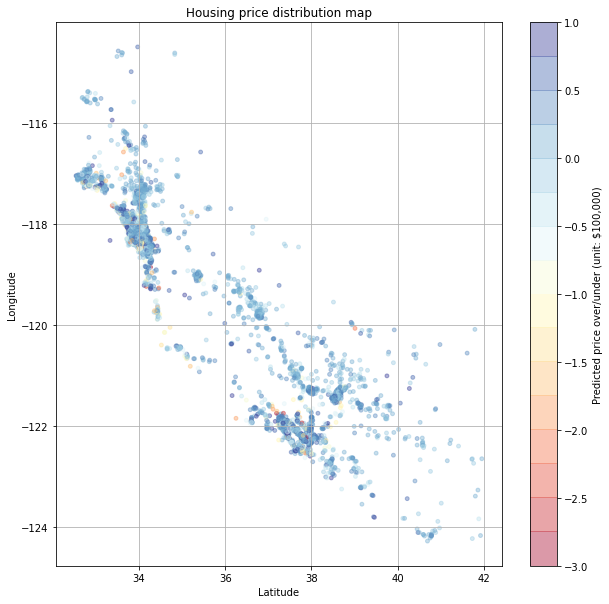

In [19]:
# Plot land map
land_map(x_test*std_data + mean_data, (y_pred.T - y_test), bar_label='Predicted price over/under (unit: $100,000)', clim=[-3, 1], step=16)